In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import datetime as dt
import calendar
from datetime import datetime

In [2]:
train=pd.read_csv('D:/biketrain.csv')
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [3]:
test=pd.read_csv('D:/biketest.csv')
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [4]:
train=train.drop(['casual','registered'],axis=1)
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,1


In [5]:
train["date"] = train.datetime.apply(lambda x : x.split()[0])
train["hour"] = train.datetime.apply(lambda x : x.split()[1].split(":")[0])
train["weekday"] = train.date.apply(lambda dateString : calendar.day_name[datetime.strptime(dateString,"%Y-%m-%d").weekday()])
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,date,hour,weekday
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,16,2011-01-01,00,Saturday
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,40,2011-01-01,01,Saturday
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,32,2011-01-01,02,Saturday
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,13,2011-01-01,03,Saturday
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,1,2011-01-01,04,Saturday


In [6]:
train["month"] = train.date.apply(lambda dateString : calendar.month_name[datetime.strptime(dateString,"%Y-%m-%d").month])
train["season"] = train.season.map({1: "Spring", 2 : "Summer", 3 : "Fall", 4 :"Winter" })
train["weather"] = train.weather.map({1: " Clear + Few clouds + Partly cloudy + Partly cloudy",\
                                        2 : " Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist ", \
                                        3 : " Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds", \
                                        4 :" Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog " })
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,date,hour,weekday,month
0,2011-01-01 00:00:00,Spring,0,0,Clear + Few clouds + Partly cloudy + Partly c...,9.84,14.395,81,0.0,16,2011-01-01,00,Saturday,January
1,2011-01-01 01:00:00,Spring,0,0,Clear + Few clouds + Partly cloudy + Partly c...,9.02,13.635,80,0.0,40,2011-01-01,01,Saturday,January
2,2011-01-01 02:00:00,Spring,0,0,Clear + Few clouds + Partly cloudy + Partly c...,9.02,13.635,80,0.0,32,2011-01-01,02,Saturday,January
3,2011-01-01 03:00:00,Spring,0,0,Clear + Few clouds + Partly cloudy + Partly c...,9.84,14.395,75,0.0,13,2011-01-01,03,Saturday,January
4,2011-01-01 04:00:00,Spring,0,0,Clear + Few clouds + Partly cloudy + Partly c...,9.84,14.395,75,0.0,1,2011-01-01,04,Saturday,January


In [7]:
train.shape

(10886, 14)

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 14 columns):
datetime      10886 non-null object
season        10886 non-null object
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null object
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
count         10886 non-null int64
date          10886 non-null object
hour          10886 non-null object
weekday       10886 non-null object
month         10886 non-null object
dtypes: float64(3), int64(4), object(7)
memory usage: 1.2+ MB


In [9]:
train.shape

(10886, 14)

In [10]:
train.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
count         0
date          0
hour          0
weekday       0
month         0
dtype: int64

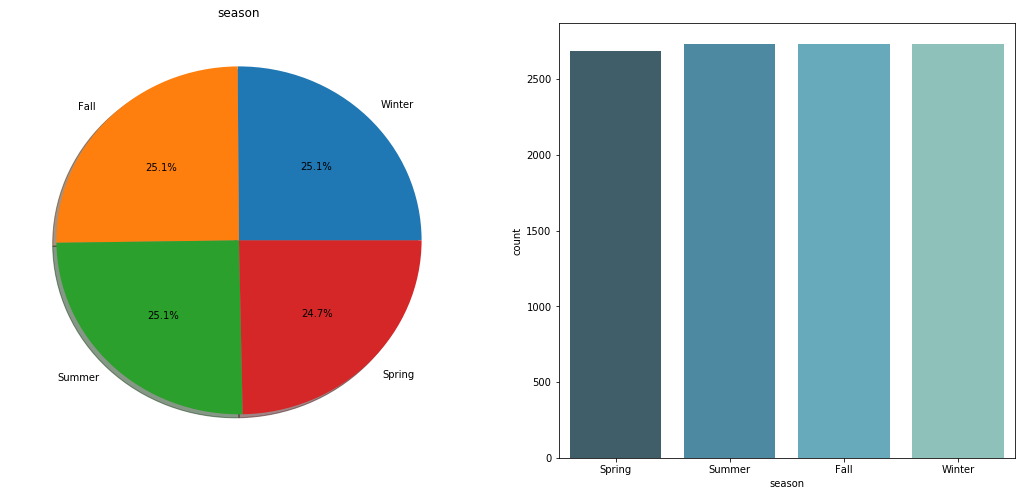

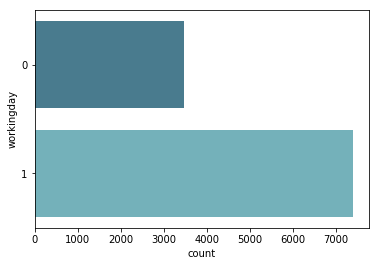

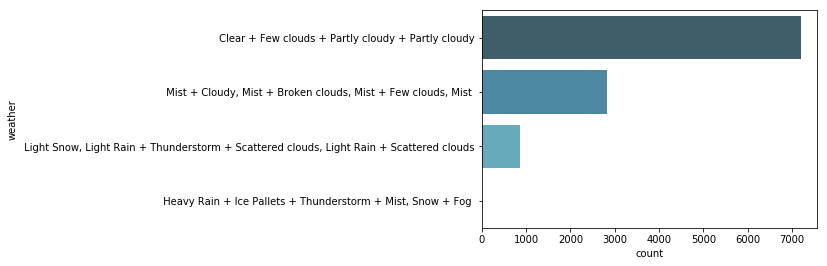

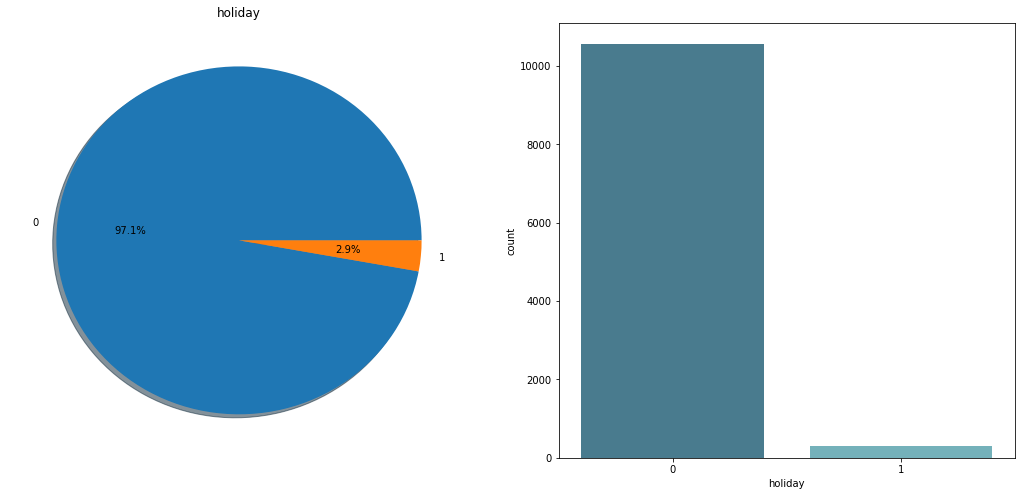

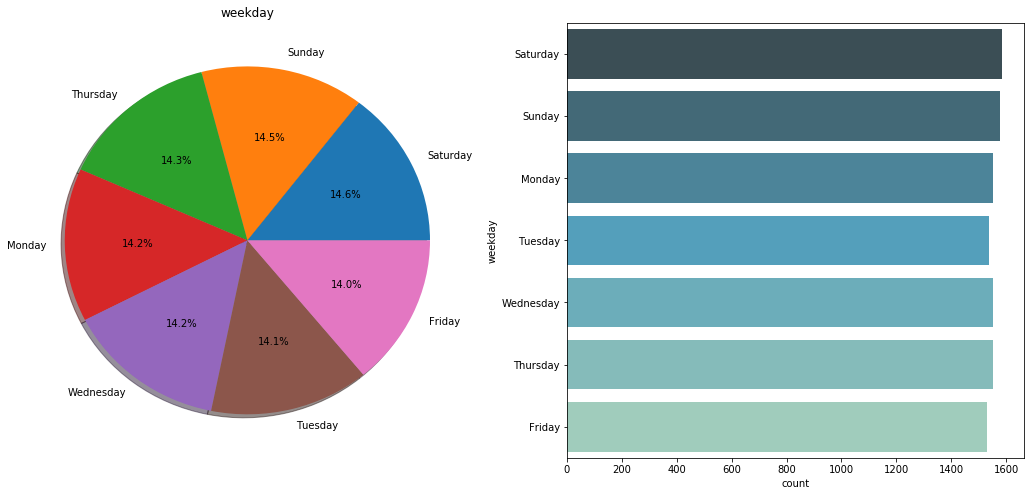

In [11]:
f,ax=plt.subplots(1,2,figsize=(18,8))
train['season'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('season')
ax[0].set_ylabel('')
sns.countplot(x='season',data=train,palette='GnBu_d')
plt.show()

ax[0].set_ylabel('')
sns.countplot(y='workingday',data=train,palette='GnBu_d')
plt.show()


ax[0].set_ylabel('')
sns.countplot(y='weather',data=train,palette='GnBu_d')
plt.show()

f,ax=plt.subplots(1,2,figsize=(18,8))
train['holiday'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('holiday')
ax[0].set_ylabel('')
sns.countplot(x='holiday',data=train,palette='GnBu_d')
plt.show()

f,ax=plt.subplots(1,2,figsize=(18,8))
train['weekday'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('weekday')
ax[0].set_ylabel('')
sns.countplot(y='weekday',data=train,palette='GnBu_d')
plt.show()

In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 14 columns):
datetime      10886 non-null object
season        10886 non-null object
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null object
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
count         10886 non-null int64
date          10886 non-null object
hour          10886 non-null object
weekday       10886 non-null object
month         10886 non-null object
dtypes: float64(3), int64(4), object(7)
memory usage: 1.2+ MB


In [13]:
train['date'] = pd.to_datetime(train['date'], format='%Y/%m/%d')
train.set_index ('date', inplace=True)

In [67]:
training=train.groupby('date').sum()[['count']]
training.head()

,count
date,
2011-01-01,985
2011-01-02,801
2011-01-03,1349
2011-01-04,1562
2011-01-05,1600


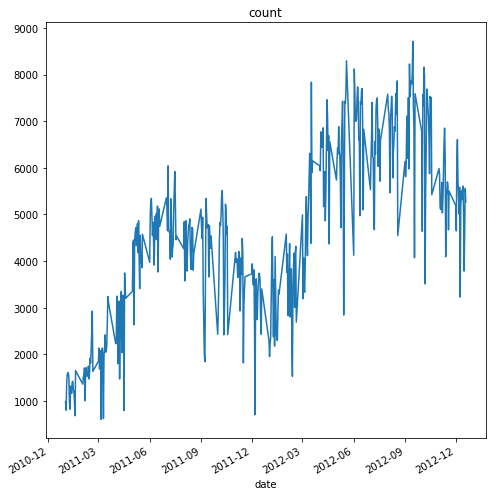

In [54]:
plt.figure(figsize=(7,7))
ts=training['count'].plot(title='count')
plt.tight_layout()

Text(0.5,1,'windspeed')

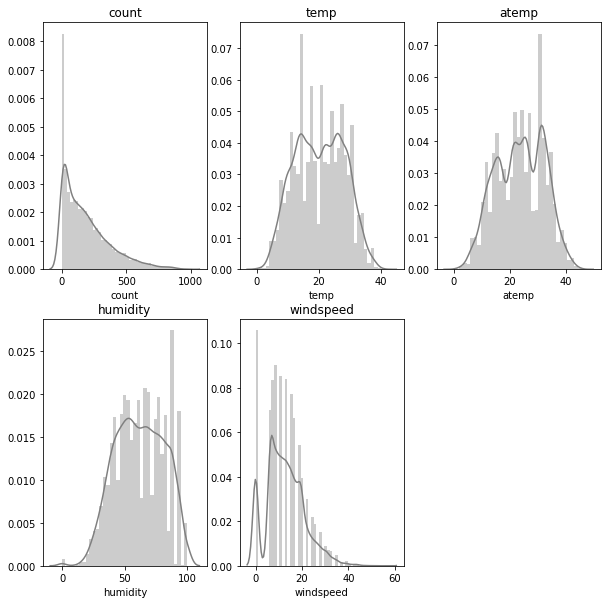

In [16]:
plt.figure(figsize=(10,10))

plt.subplot(231)
sns.distplot(train['count'], kde=True, color = 'grey' )
plt.title('count')

plt.subplot(232)
sns.distplot(train['temp'], kde=True, color = 'grey')
plt.title('temp')

plt.subplot(233)
sns.distplot(train['atemp'], kde=True, color = 'grey')
plt.title('atemp')

plt.subplot(234)
sns.distplot(train['humidity'], kde=True, color = 'grey')
plt.title('humidity')

plt.subplot(235)
sns.distplot(train['windspeed'], kde=True, color = 'grey')
plt.title('windspeed')

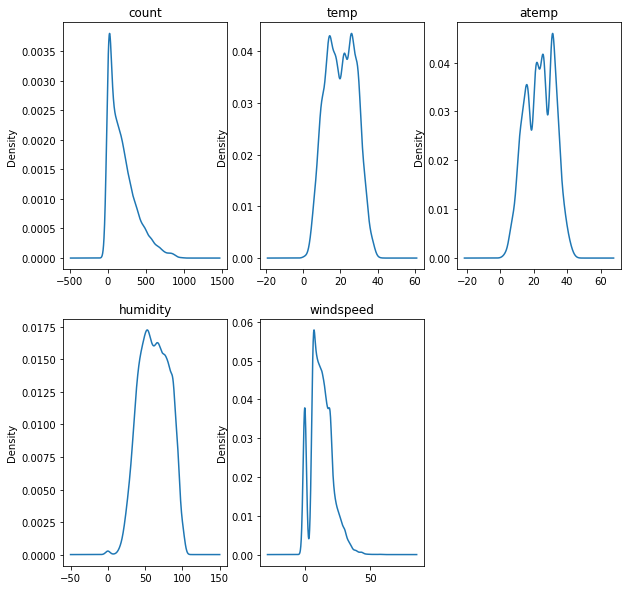

In [17]:
plt.figure(figsize=(10,10))
plt.subplot(231)
plt.title('count')
train['count'].plot.kde()
plt.subplot(232)
plt.title('temp')
train['temp'].plot.kde()
plt.subplot(233)
plt.title('atemp')
train['atemp'].plot.kde()
plt.subplot(234)
plt.title('humidity')
train['humidity'].plot.kde()
plt.subplot(235)
plt.title('windspeed')
train['windspeed'].plot.kde()
plt.show()

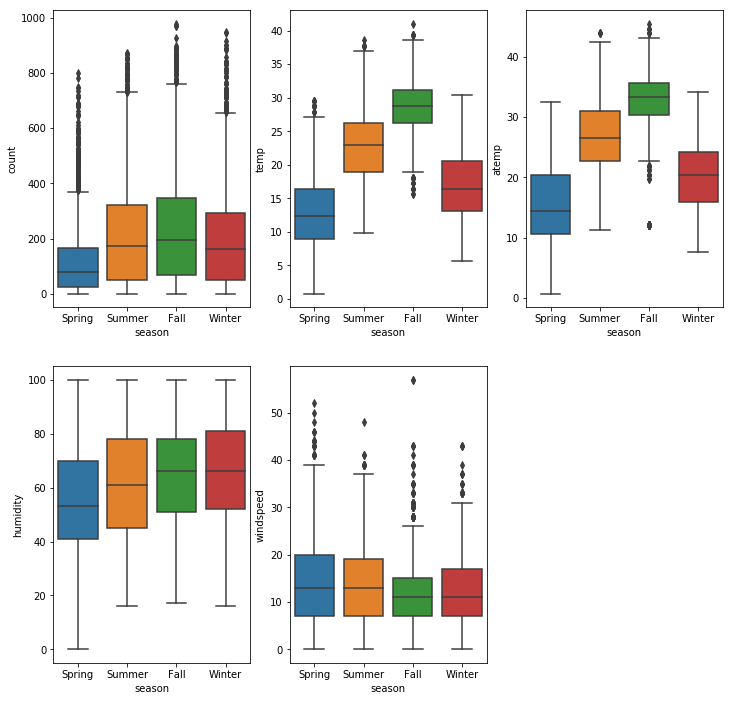

In [18]:
plt.figure(figsize=(12,12))
plt.subplot(231)
sns.boxplot(x =train['season'], y = train['count'])
plt.subplot(232)
sns.boxplot(x =train['season'], y = train['temp'] )
plt.subplot(233)
sns.boxplot(x =train['season'], y = train['atemp'])
plt.subplot(234)
sns.boxplot(x =train['season'], y = train['humidity'])
plt.subplot(235)
sns.boxplot(x =train['season'], y = train['windspeed'])
plt.show()

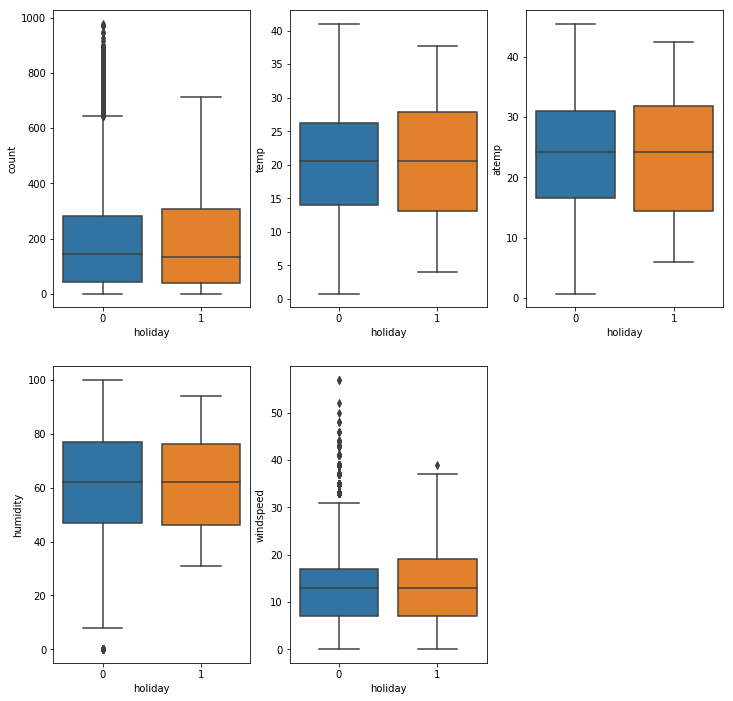

In [19]:
plt.figure(figsize=(12,12))
plt.subplot(231)
sns.boxplot(x =train['holiday'], y = train['count'])
plt.subplot(232)
sns.boxplot(x =train['holiday'], y = train['temp'] )
plt.subplot(233)
sns.boxplot(x =train['holiday'], y = train['atemp'])
plt.subplot(234)
sns.boxplot(x =train['holiday'], y = train['humidity'])
plt.subplot(235)
sns.boxplot(x =train['holiday'], y = train['windspeed'])
plt.show()

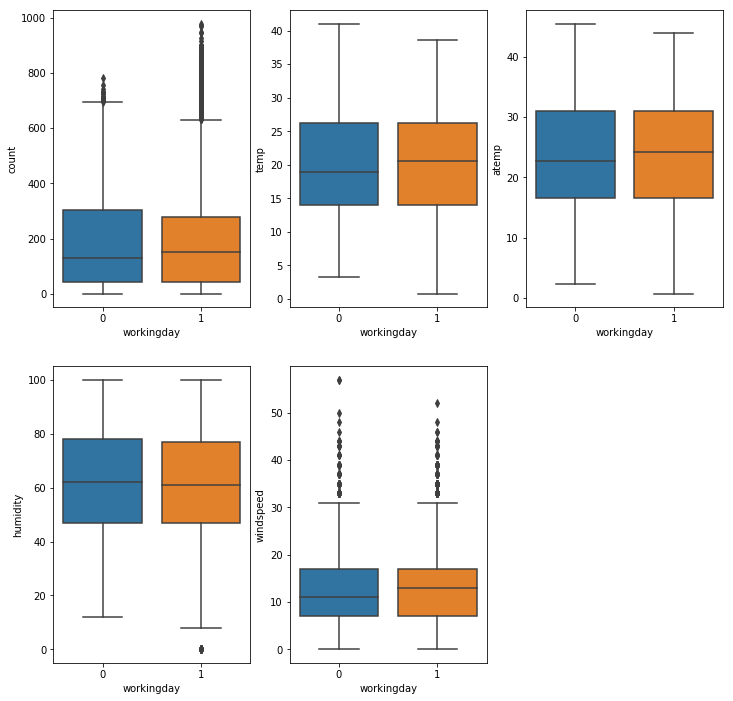

In [20]:
plt.figure(figsize=(12,12))
plt.subplot(231)

sns.boxplot(x =train['workingday'], y = train['count'])
plt.subplot(232)
sns.boxplot(x =train['workingday'], y = train['temp'] )
plt.subplot(233)
sns.boxplot(x =train['workingday'], y = train['atemp'])
plt.subplot(234)
sns.boxplot(x =train['workingday'], y = train['humidity'])
plt.subplot(235)
sns.boxplot(x =train['workingday'], y = train['windspeed'])
plt.show()

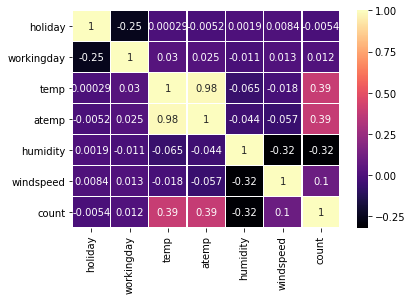

In [21]:
corr = train.corr()
df = pd.DataFrame(train.corr())
sns.heatmap(df, cmap='magma', linewidths=0.5, annot=True)
plt.show()

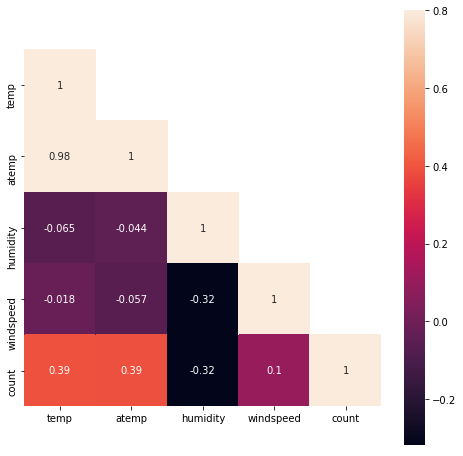

In [25]:
corr = train[["temp","atemp","humidity","windspeed","count"]].corr()
corr


mask = np.array(corr)
mask


mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(8,8)
sns.heatmap(corr, mask=mask,vmax=.8, square=True,annot=True)

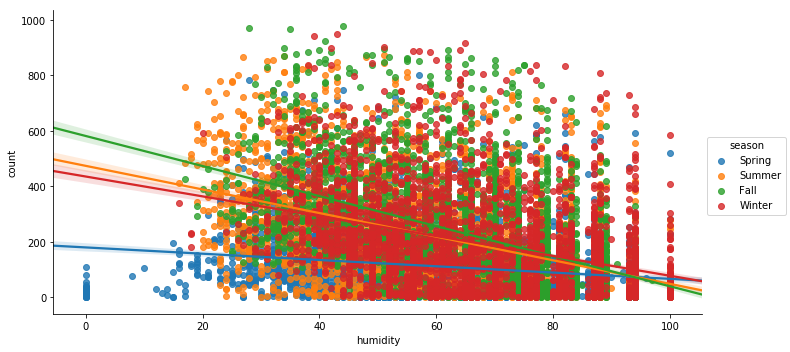

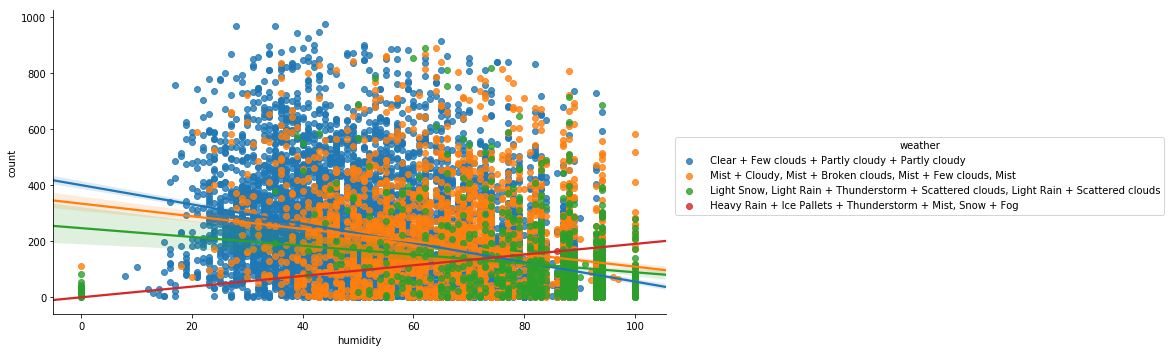

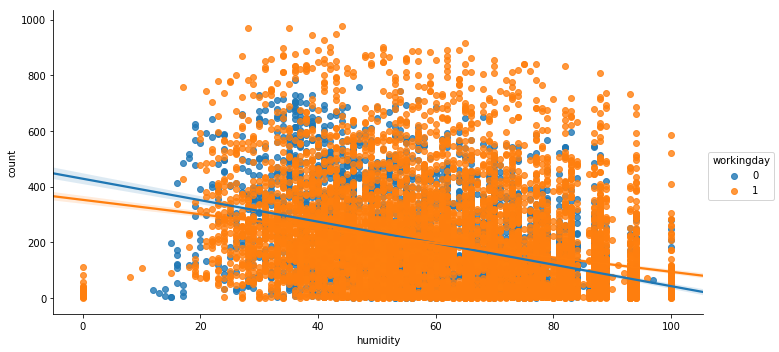

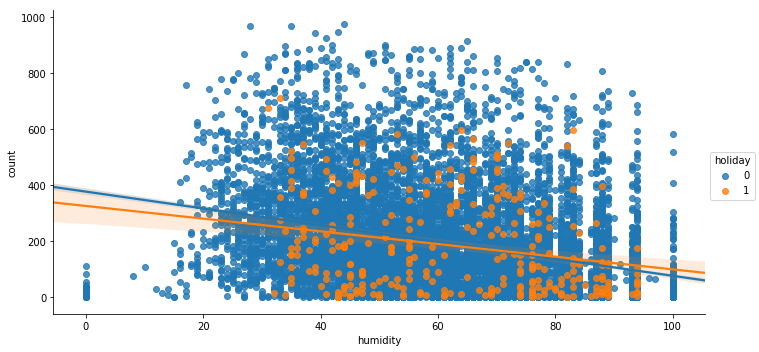

In [72]:
sns.lmplot(aspect=2,x='humidity',y='count',data=train,hue='season')
plt.show()

sns.lmplot(aspect=2,x='humidity',y='count',data=train,hue='weather')
plt.show()

sns.lmplot(aspect=2,x='humidity',y='count',data=train,hue='workingday')
plt.show()

sns.lmplot(aspect=2,x='humidity',y='count',data=train,hue='holiday')
plt.show()